In [52]:
import pandas as pd
import numpy as np

In [53]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [54]:
# Read the data set
data = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

In [55]:
data.head()

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [56]:
#Lets check the shape of the dataste
data.shape

(2000, 14)

In [57]:
#Lets check for isnull
data.isna().sum()

id                 0
job                0
area               0
income            59
aspect             0
subscriptions      0
dist_healthy       0
save_rate          0
dist_unhealthy     0
age                0
pop_dense          0
retail_dense       0
crime              0
product            0
dtype: int64

In [58]:
# Generate dummies for job
data = pd.concat([data,pd.get_dummies(df['job'],prefix="job")],axis=1)
data.drop('job', axis=1, inplace=True)


In [59]:
# Generate dummies for area
data = pd.concat([data,pd.get_dummies(data['area'],prefix="area")],axis=1)
data.drop('area', axis=1, inplace=True)


In [60]:
data.head()

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,...,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,...,0,0,0,0,1,0,0,0,1,0
1,2,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,...,0,0,0,0,0,0,0,0,1,0
2,3,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,...,0,0,0,0,0,0,0,0,1,0
3,4,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,...,0,0,0,0,0,0,0,0,1,0
4,5,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,...,0,0,0,0,0,0,0,0,0,1


In [61]:
# Generate dummies for product
data = pd.concat([data,pd.get_dummies(data['product'],prefix="product")],axis=1)
data.drop('product', axis=1, inplace=True)

In [62]:
# Missing values for income
med = data['income'].median()
data['income'] = data['income'].fillna(med)


In [66]:
# Standardize ranges
data['income'] = zscore(data['income'])
data['aspect'] = zscore(data['aspect'])
data['save_rate'] = zscore(data['save_rate'])
data['subscriptions'] = zscore(data['subscriptions'])

In [67]:
# Convert to numpy - Classification
x_columns = data.columns.drop('age').drop('id')


In [68]:
x = data[x_columns].values
y = data['age'].values


In [69]:
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

Next, we create a neural network to fit the data we just loaded.

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)


In [71]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=100)

Epoch 1/100
47/47 - 1s - loss: 2006.0483 - val_loss: 1709.3187 - 1s/epoch - 26ms/step
Epoch 2/100
47/47 - 0s - loss: 1352.8806 - val_loss: 891.8115 - 123ms/epoch - 3ms/step
Epoch 3/100
47/47 - 0s - loss: 535.6667 - val_loss: 283.9444 - 179ms/epoch - 4ms/step
Epoch 4/100
47/47 - 0s - loss: 264.9841 - val_loss: 231.3433 - 168ms/epoch - 4ms/step
Epoch 5/100
47/47 - 0s - loss: 209.2895 - val_loss: 181.0500 - 129ms/epoch - 3ms/step
Epoch 6/100
47/47 - 0s - loss: 159.0199 - val_loss: 138.3301 - 134ms/epoch - 3ms/step
Epoch 7/100
47/47 - 0s - loss: 120.4654 - val_loss: 106.8155 - 120ms/epoch - 3ms/step
Epoch 8/100
47/47 - 0s - loss: 92.5583 - val_loss: 84.1011 - 206ms/epoch - 4ms/step
Epoch 9/100
47/47 - 0s - loss: 72.4590 - val_loss: 68.4774 - 240ms/epoch - 5ms/step
Epoch 10/100
47/47 - 0s - loss: 58.6904 - val_loss: 56.5671 - 183ms/epoch - 4ms/step
Epoch 11/100
47/47 - 0s - loss: 48.2168 - val_loss: 47.2123 - 241ms/epoch - 5ms/step
Epoch 12/100
47/47 - 0s - loss: 40.1327 - val_loss: 39.9965

In [72]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure R-squared
r2_score = metrics.r2_score(y_test, pred)

# Transform R-squared into an accuracy-like score
accuracy_score = (1 - r2_score) * 100

print("Accuracy Score: {:.2f}%".format(accuracy_score))


16/16 [==============================] - 0s 2ms/step
Accuracy Score: 4.92%


In [73]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.8435456135023898


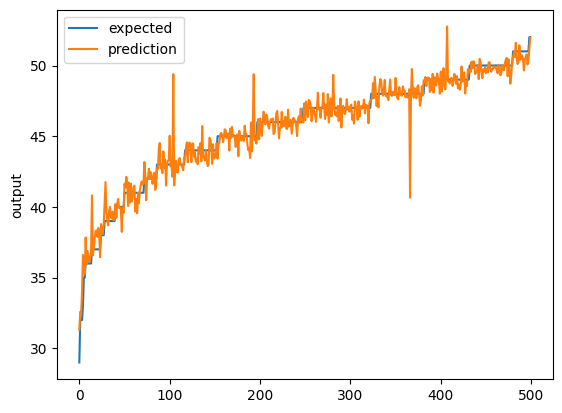

In [74]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(pred.flatten(),y_test)

In [33]:
#Intern at Pranathi
#Student of DataTrained
#Date -> 4-05-2023
#Time -> 22:54